# Intro to ggplot2: bar plots 

With `ggplot2`, we dive into the world of programmatic data visualization. The `ggplot2` library implements something called the grammar of graphics. The main concepts are: 

* aesthetics - which in this case means the data which we are going to plot
* geometries - which means the shape the data is going to take
* scales - which means any transformations we might make on the data
* facets - which means how we might graph many elements of the same dataset in the same space
* layers - which means how we might lay multiple geometries over top of each other to reveal new information.

Hadley Wickam, who is behind all of the libaries we have used in this course to date, wrote about his layered grammar of graphics in [this 2009 paper that is worth your time to read](http://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf). 

Here are some `ggplot2` resources you'll want to keep handy: 

* [The ggplot documentation](http://ggplot2.tidyverse.org/reference/index.html).
* [The ggplot cookbook](http://www.cookbook-r.com/Graphs/)

Let's dive in using data we've already seen before -- mountain lion sightings. This workflow will represent a clear picture of what your work in this class will be like for much of the rest of the semester. One way to think of this workflow is that your Jupyter Notebook is now your digital sketchbook, where you will try different types of visualizations to find ones that work. Then, you will export your work into a program like Illustrator to finish the work. 

To begin, we'll import the `ggplot2` and `dplyr` libraries. We'll read in the data, then create a new dataframe that represents our mountain lion data grouped by counties, similar to what we've done before. 

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
mountainlions <- read.csv("../../Data/mountainlions.csv")

The easiest thing we can do is create a simple histogram of our data. We could, for instance, create a bar chart of the number of times a county appears in the data. To do that, we simply tell `ggplot2` what our dataset is, what element of the data we want to make the histogram out of (which is the aesthetic), and the geometry type. It looks like this:

`ggplot(mountainlions, aes(x=COUNTY)) + geom_bar()` 

Note: mountainlions is our data, `aes` means aesthetics, `x=COUNTY` explicitly tells `ggplot2` that our x value -- our horizontal value -- is the COUNTY field from the data, and then we add on the `geom_bar()` as the geometry. And what do we get when we run that? 

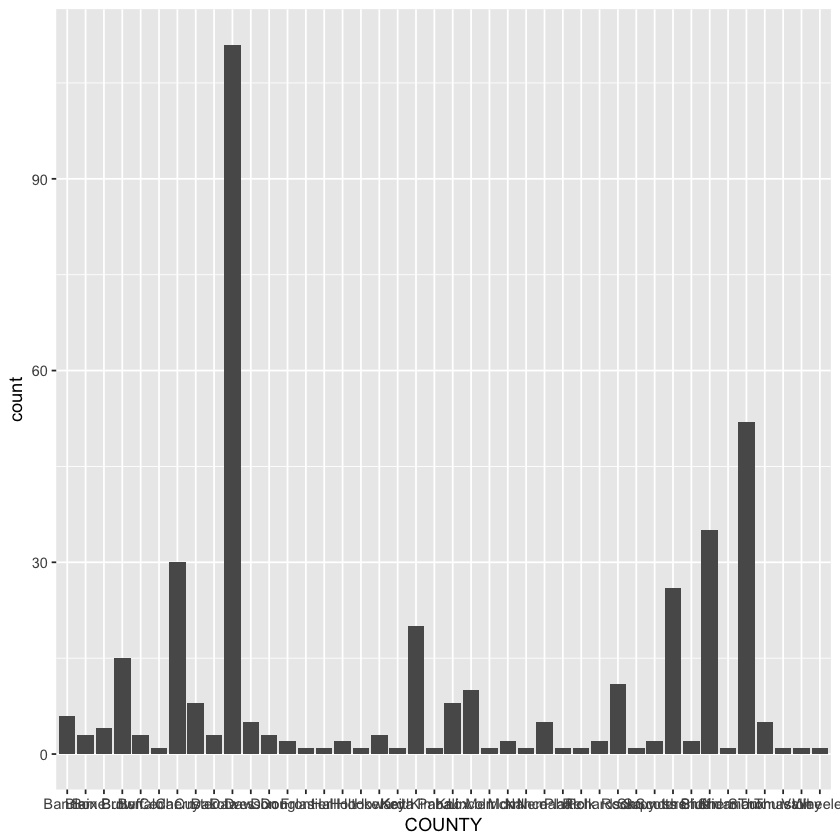

In [3]:
ggplot(mountainlions, aes(x=COUNTY)) + geom_bar()

Well. We get a chart. So that's ... something. But it's kind of a mess. There's too many values, you can't read them on the bottom, they aren't in order. It's just a mess. So often times with bar charts, it's better to do our own grouping and counting, because we can control the data more than we can through `ggplot2`. 

In [4]:
counties <- mountainlions %>%
  group_by(COUNTY) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count))

In [5]:
head(counties)

COUNTY,count
Dawes,111
Sioux,52
Sheridan,35
Cherry,30
Scotts Bluff,26
Keya Paha,20


So what happens when we put counties in as our dataset, which did all the grouping and counting for `ggplot2` instead of having ggplot do it? 

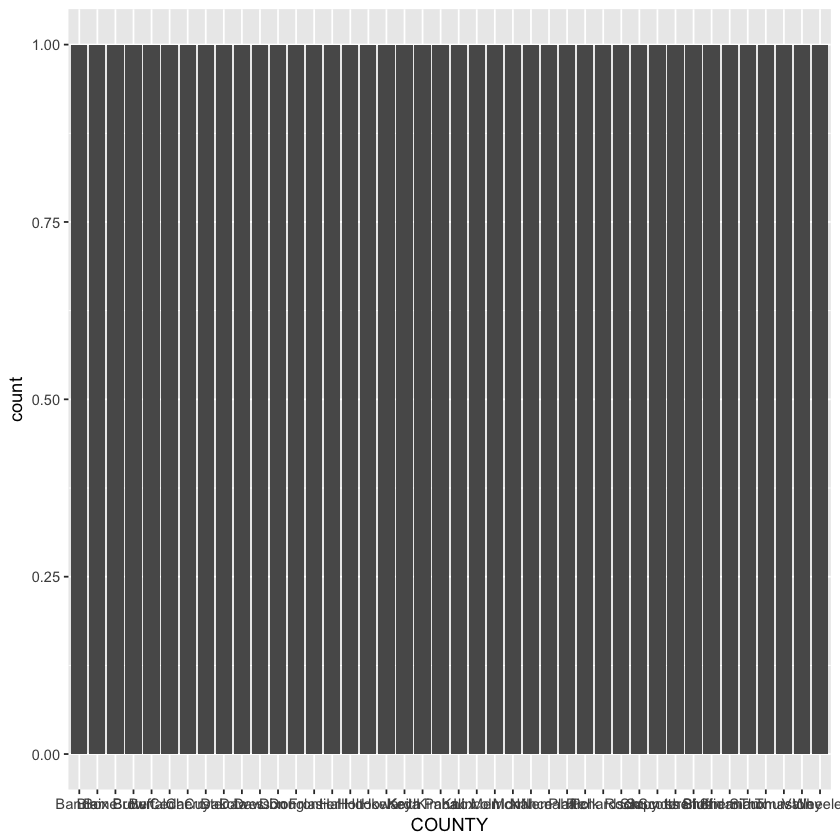

In [6]:
ggplot(counties, aes(x=COUNTY)) + geom_bar()

Gah. That's awful. Everything is the same now! Well, `ggplot2` default is to count each X value and use that to create the bar. So we grouped everything together, so there's only one of each county -- thus, why there's only one of everything. So we need to tell `ggplot2` that we have something else to use to make the bars. In `ggplot2`, that's called the `weight` and it goes into the aesthetics. 

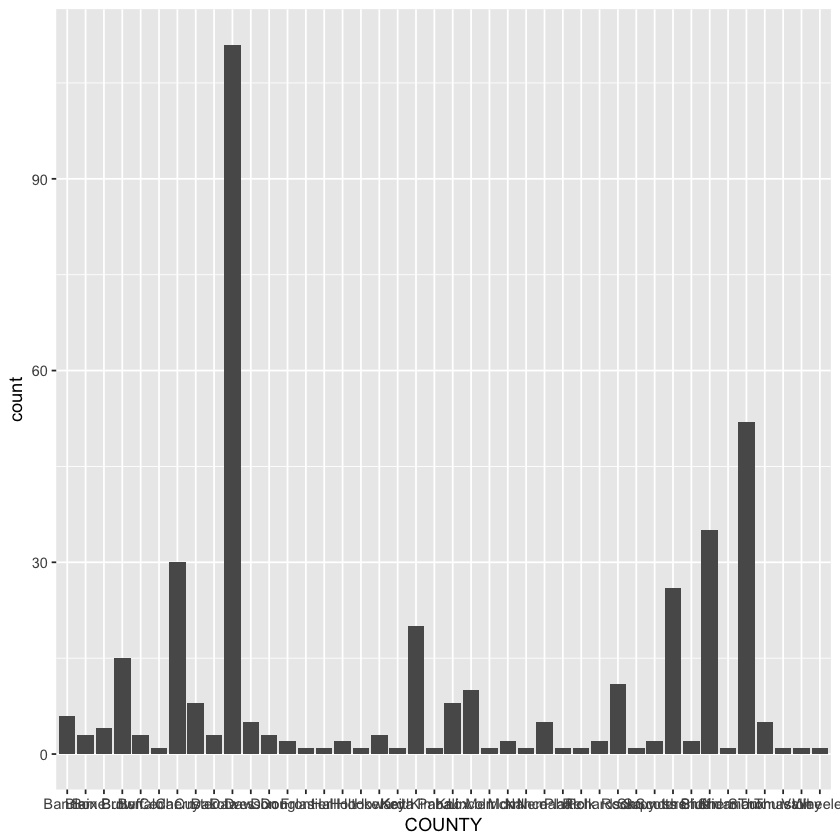

In [7]:
ggplot(counties, aes(COUNTY, weight=count)) + geom_bar()

Better, but we're back where we started. What if we limited the chart to only the counties with a large number of sightings? We can do that in `dpylr` by using `filter` at the end. Note the last step of the data prep here: 

In [8]:
counties <- mountainlions %>%
  group_by(COUNTY) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count)) %>%
  filter(count > 10)

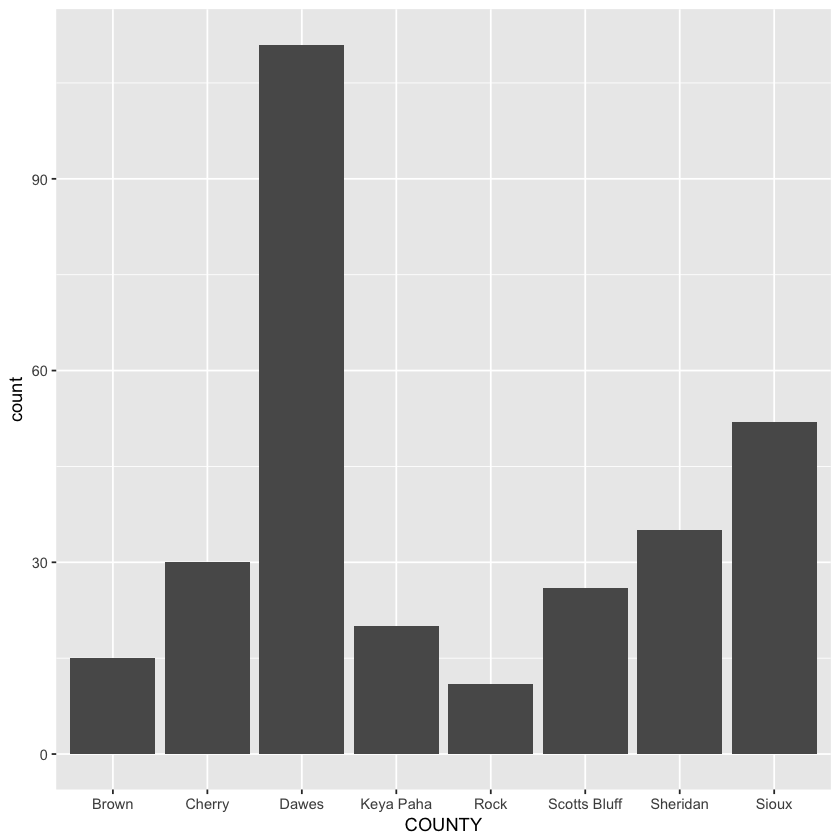

In [9]:
ggplot(counties, aes(COUNTY, weight=count)) + geom_bar()

Better still, but the bars aren't in any order that makes sense -- they're in alphabetical order by county, even though our dataset sorts them. That's because `ggplot2` ignores any ordering you do to the data ahead of time, and the ordering done in arrange doens't really stick. To get it to do that, we have two options: We can reorder it in `ggplot2` using `reorder` in the aesthetics -- `reorder(COUNTY, count)` which says reorder the order of the counties by the value of count. 

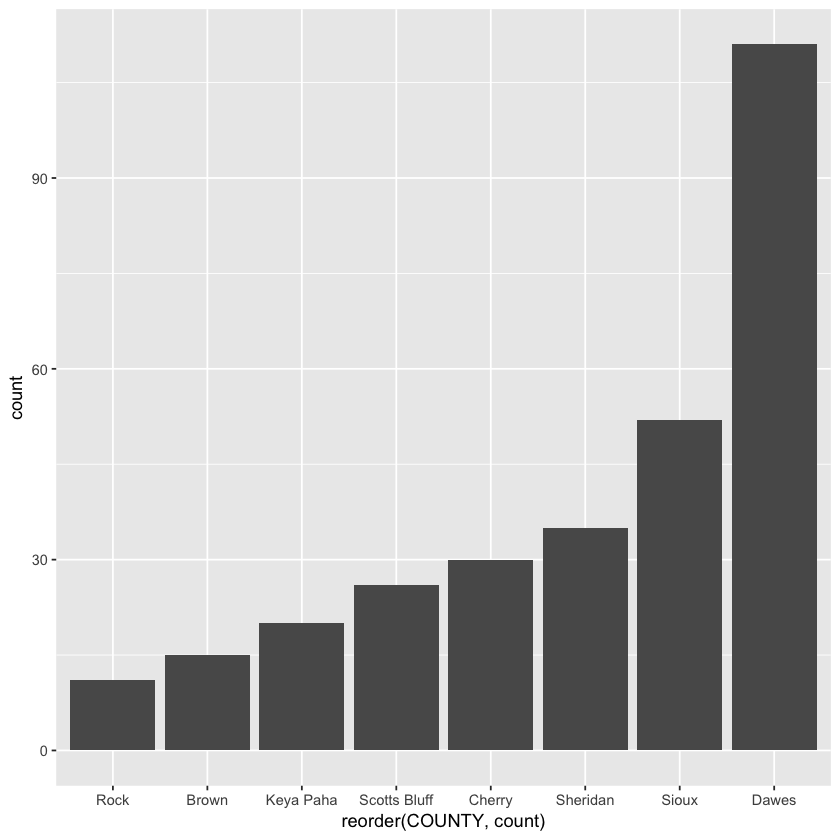

In [10]:
ggplot(counties, aes(reorder(COUNTY, count), weight=count)) + geom_bar()

But that looks silly because the least value is first when it should be the greatest value. So we can change that pretty easily.

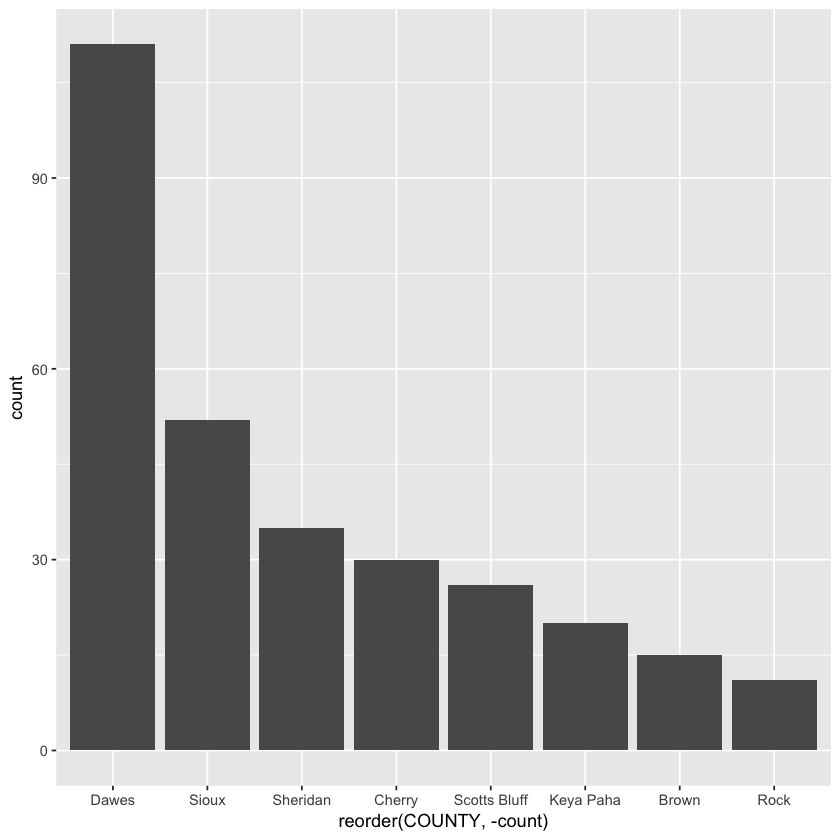

In [11]:
ggplot(counties, aes(reorder(COUNTY, -count), weight=count)) + geom_bar()

Our other option is to fix the ordering in our dplyr work with an additional mutate step. We do that by adding `%>% mutate(COUNTY = factor(COUNTY, COUNTY))`. What that says in English is mutate COUNTY by reordering the factor COUNTY by what is in COUNTY, which, thanks to arrange, is in the order we want it to be in. 

In [12]:
counties <- mountainlions %>%
  group_by(COUNTY) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count)) %>%
  filter(count > 10) %>% mutate(COUNTY = factor(COUNTY, COUNTY))

Which means we can now go back to our more simple `ggplot2` code from before.

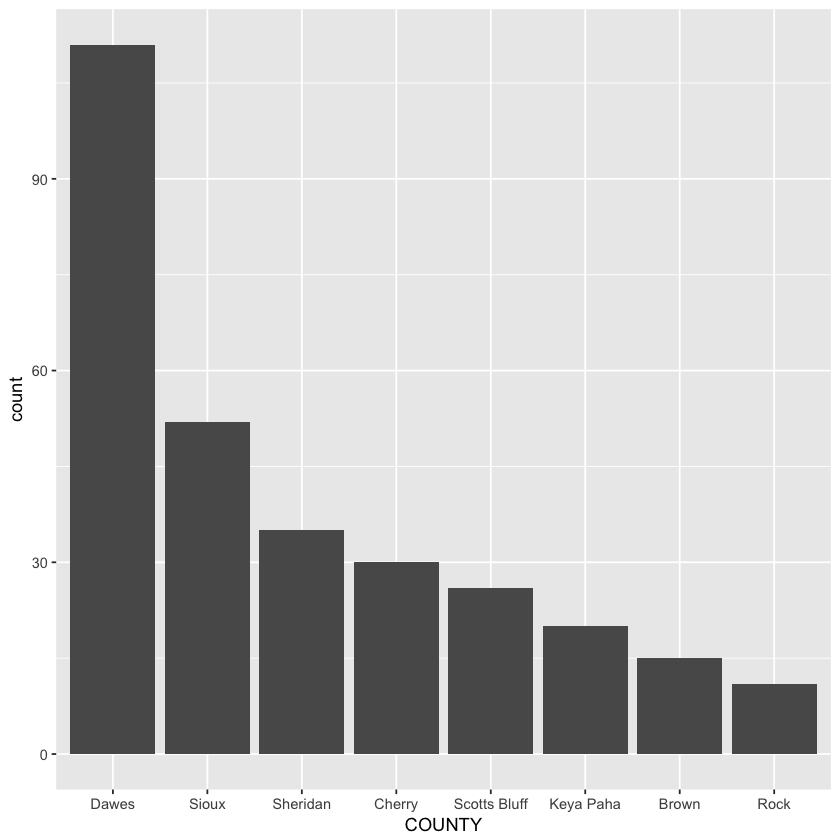

In [13]:
ggplot(counties, aes(COUNTY, weight=count)) + geom_bar()

One neat little trick? What if we didn't want vertical bars? We want horizontal bars? We can use `coord_flip()` to do that. 

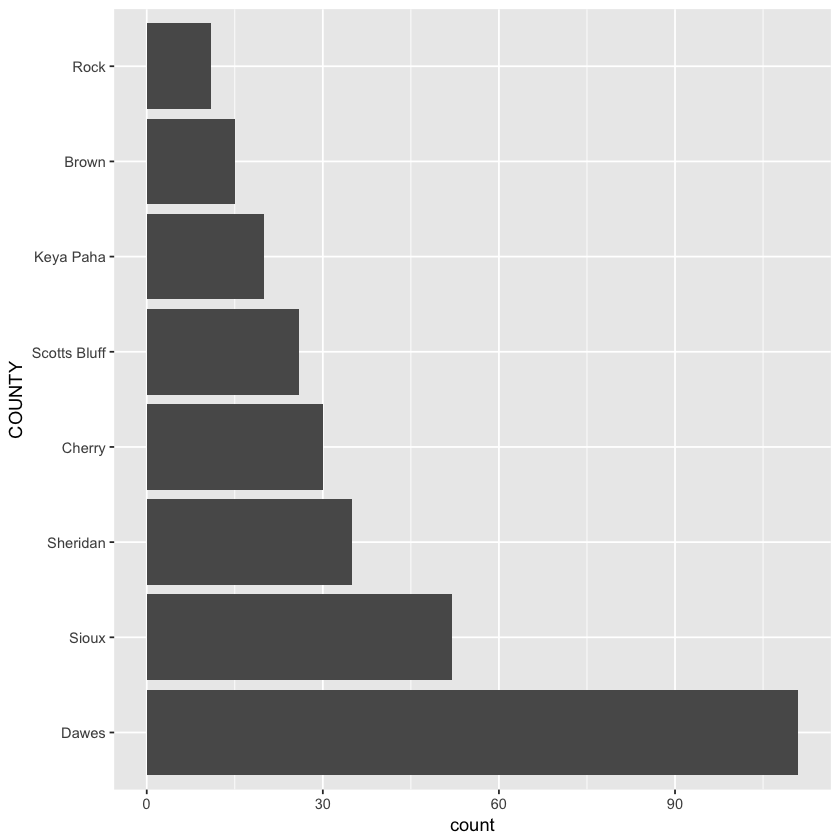

In [14]:
ggplot(counties, aes(COUNTY, weight=count)) + geom_bar() + coord_flip()

## Assignment

Using the UNL police data you used in the first R assignment, chart the 10 largest reported crimes to UNLPD in the dataset. 

#### Rubric
1. Did you import the data correctly?
2. Did you manipulate the data correctly?
3. Did you chart the data?
4. Did you explain your steps in Markdown comments?